In [2]:
from nilearn.plotting import plot_glass_brain
import nilearn.plotting
import glob
import nibabel as nib
from nilearn.image import mean_img
import nilearn.plotting as plotting
import numpy as np

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
stat_files = glob.glob('/media/Drobo/work/KPE_SPM_ses1/Sink_ses-1/2ndLevel/_contrast_id_con_000*/spmT_0001_thr.nii')
stat_files

['/media/Drobo/work/KPE_SPM_ses1/Sink_ses-1/2ndLevel/_contrast_id_con_0004/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses1/Sink_ses-1/2ndLevel/_contrast_id_con_0002/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses1/Sink_ses-1/2ndLevel/_contrast_id_con_0006/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses1/Sink_ses-1/2ndLevel/_contrast_id_con_0003/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses1/Sink_ses-1/2ndLevel/_contrast_id_con_0005/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses1/Sink_ses-1/2ndLevel/_contrast_id_con_0001/spmT_0001_thr.nii']

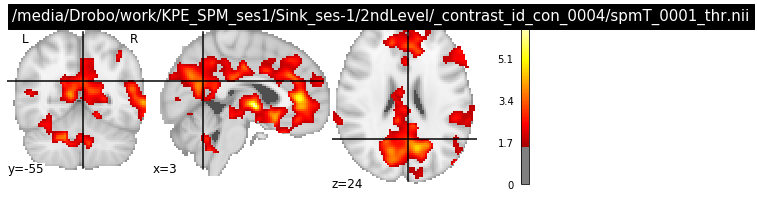

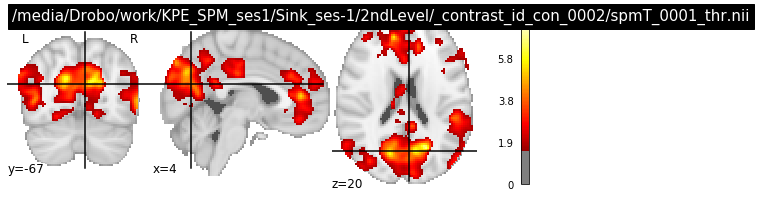

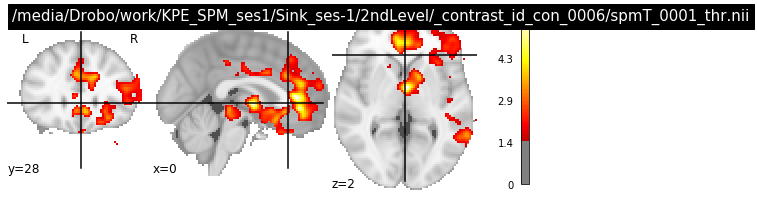

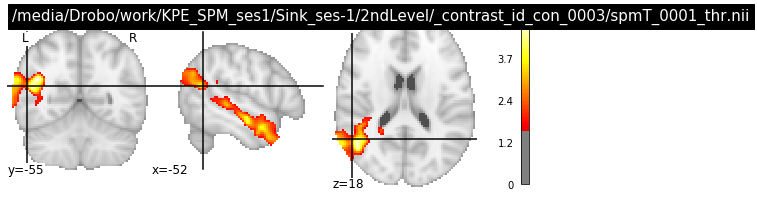

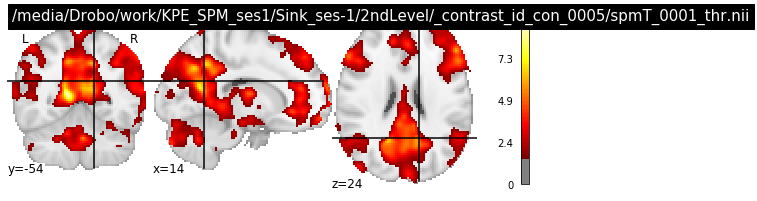

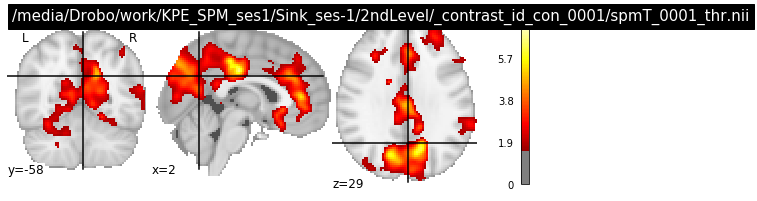

In [4]:
for stat in stat_files:
    plotting.plot_stat_map(stat,threshold = 1.6, title=stat)

In [5]:
stat_files_ses2 = glob.glob('/media/Drobo/work/KPE_SPM_ses2/Sink_ses-2/2ndLevel/_contrast_id_con_000*/spmT_0001_thr.nii')
stat_files_ses2

['/media/Drobo/work/KPE_SPM_ses2/Sink_ses-2/2ndLevel/_contrast_id_con_0004/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses2/Sink_ses-2/2ndLevel/_contrast_id_con_0002/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses2/Sink_ses-2/2ndLevel/_contrast_id_con_0006/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses2/Sink_ses-2/2ndLevel/_contrast_id_con_0003/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses2/Sink_ses-2/2ndLevel/_contrast_id_con_0005/spmT_0001_thr.nii',
 '/media/Drobo/work/KPE_SPM_ses2/Sink_ses-2/2ndLevel/_contrast_id_con_0001/spmT_0001_thr.nii']

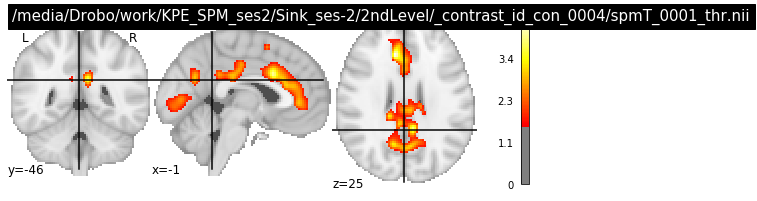

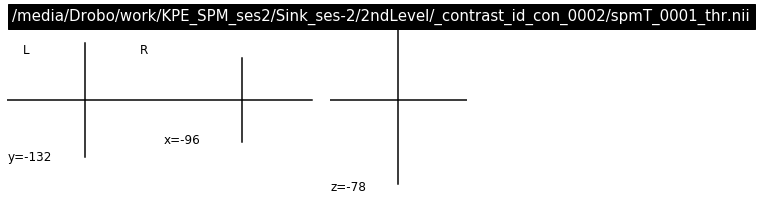

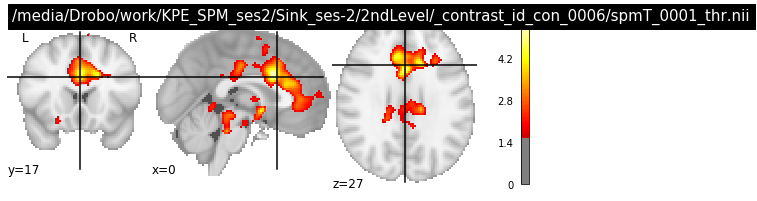

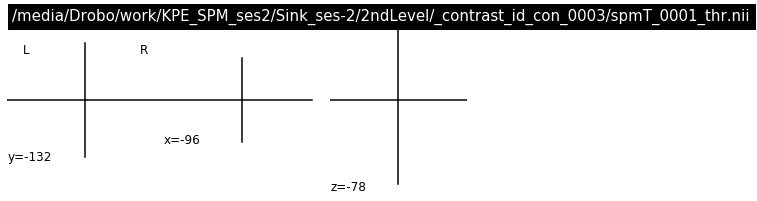

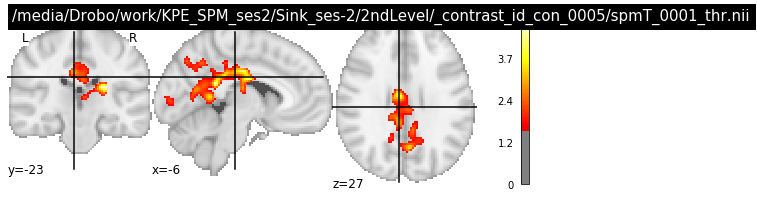

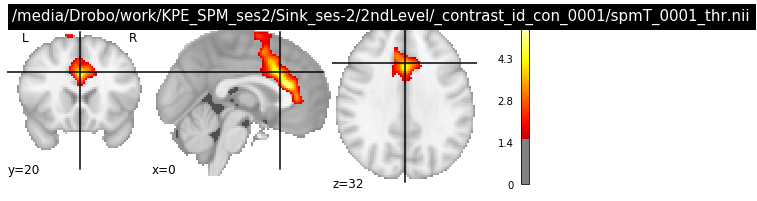

In [7]:
for stat in stat_files_ses2:
    plotting.plot_stat_map(stat,threshold = 1.6, title=stat)

## Now lets look at difference between the groups (Ketamine Vs. Midazolam)

In [8]:
# lets see the difference between groups
import pandas as pd
allDat = pd.read_excel('/home/or/Documents/kpe_analyses/KPEIHR0009_data_all_scored.xlsx')
medDat = allDat[['scr_id','med_cond']]
medDat.at[17, 'med_cond'] = 1 # change subject 1464 medication to 1
medDat = medDat.append({'scr_id' : 'KPE1468' , 'med_cond' : 0}, ignore_index=True)
medDat = medDat.append({'scr_id' : 'KPE1480' , 'med_cond' : 0}, ignore_index=True)
medDat = medDat.append({'scr_id' : 'KPE1499' , 'med_cond' : 1}, ignore_index=True)

groupList = np.array(medDat['med_cond'])
groupList.shape
subjectList = medDat['scr_id']
ketList = []
midList = []
for i in medDat.iterrows():
    sub = i[1].scr_id.split('KPE')[1]
    if i[1].med_cond ==1:
        ketList.append(sub)
    elif i[1].med_cond==0:
        midList.append(sub)
    else:
        print('No medication condition')

print (f'Number of Ketamine patients is: {len(ketList)}')
print (f'Number of Midazolam patients is: {len(midList)}')

Number of Ketamine patients is: 11
Number of Midazolam patients is: 10


In [13]:
medDat.to_csv('kpe_sub_condition.csv', index=False)

In [49]:
group_diff = glob.glob('/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_000*/_level2thresh0/spmT_0001_thr.nii')
group_diff

['/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0001/_level2thresh0/spmT_0001_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0003/_level2thresh0/spmT_0001_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0006/_level2thresh0/spmT_0001_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0004/_level2thresh0/spmT_0001_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0005/_level2thresh0/spmT_0001_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0002/_level2thresh0/spmT_0001_thr.nii']

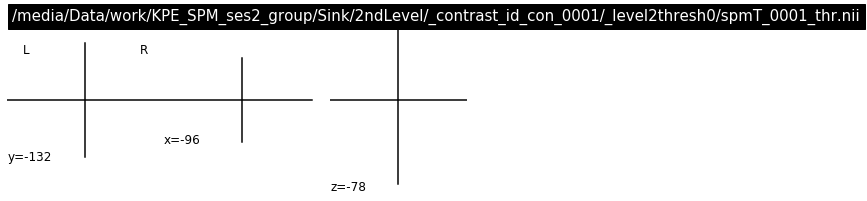

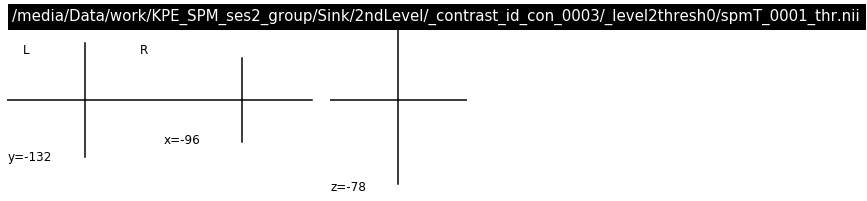

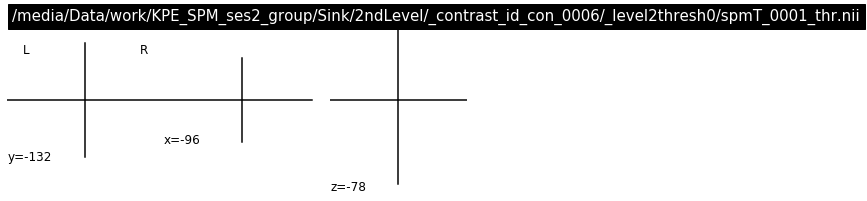

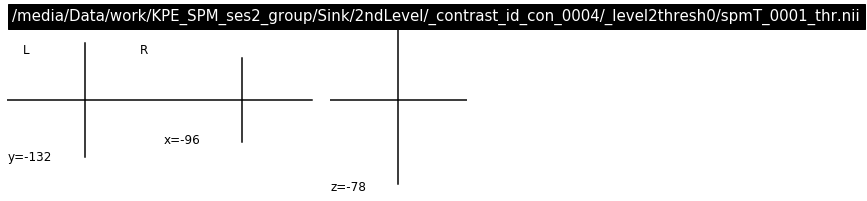

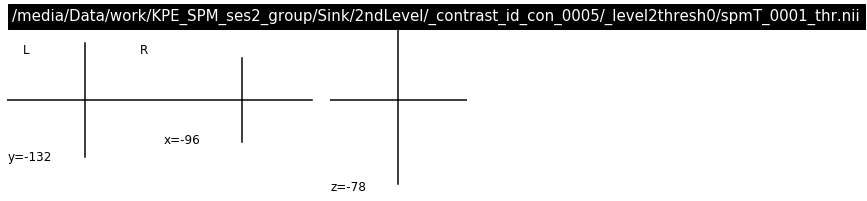

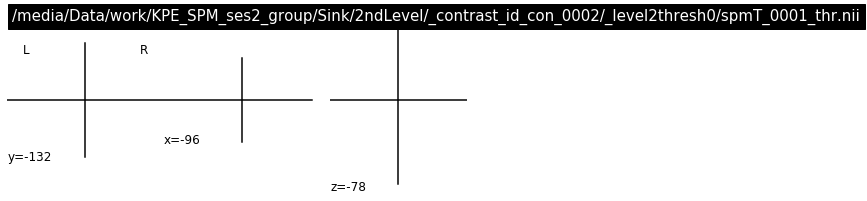

In [50]:
for stat in group_diff:
    plotting.plot_stat_map(stat, title=stat)

In [51]:
midVsKet = glob.glob('/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_000*/_level2thresh1/spmT_0002_thr.nii')
midVsKet

['/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0001/_level2thresh1/spmT_0002_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0003/_level2thresh1/spmT_0002_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0006/_level2thresh1/spmT_0002_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0004/_level2thresh1/spmT_0002_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0005/_level2thresh1/spmT_0002_thr.nii',
 '/media/Data/work/KPE_SPM_ses2_group/Sink/2ndLevel/_contrast_id_con_0002/_level2thresh1/spmT_0002_thr.nii']

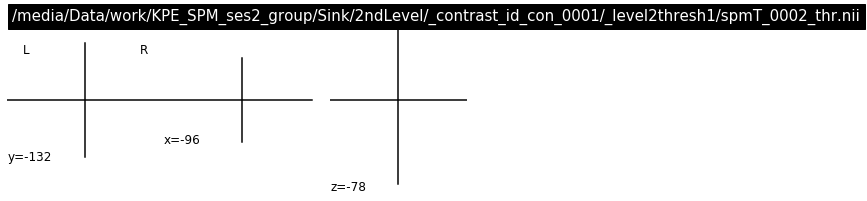

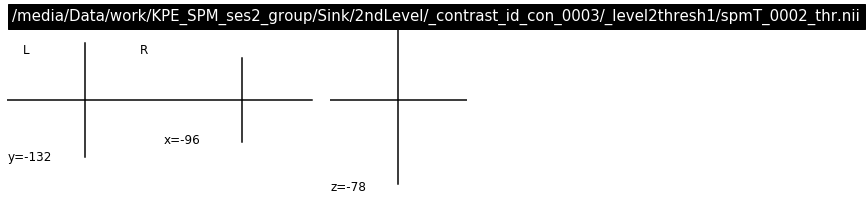

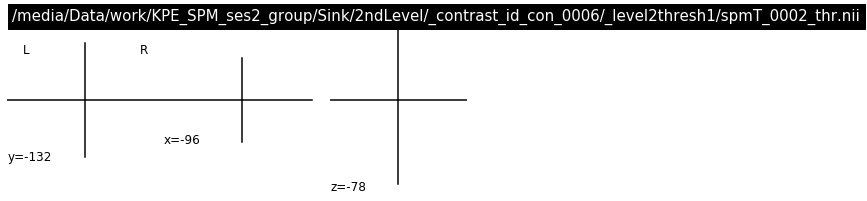

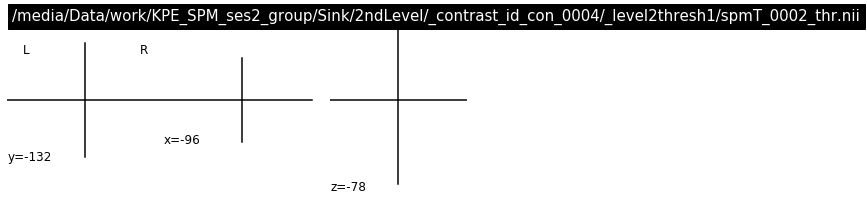

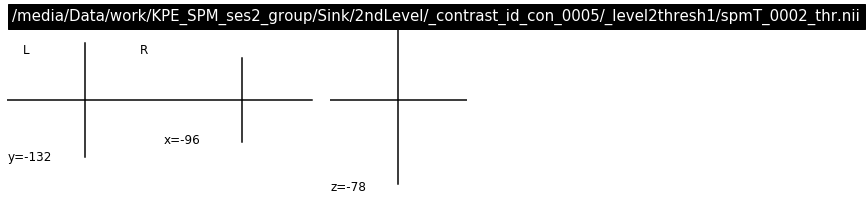

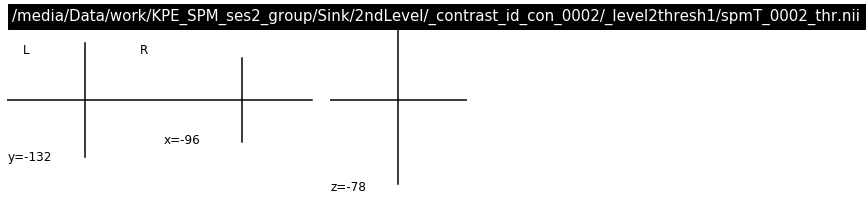

In [52]:
for stat in midVsKet:
    plotting.plot_stat_map(stat, title=stat)

In [38]:
conFiles = glob.glob('/media/Data/work/KPE_SPM_ses2/spm_l2analysisGroup/_contrast_id_con_000*/level2conestimate/spmT_0001.nii')
conFiles

['/media/Data/work/KPE_SPM_ses2/spm_l2analysisGroup/_contrast_id_con_0001/level2conestimate/spmT_0001.nii',
 '/media/Data/work/KPE_SPM_ses2/spm_l2analysisGroup/_contrast_id_con_0003/level2conestimate/spmT_0001.nii',
 '/media/Data/work/KPE_SPM_ses2/spm_l2analysisGroup/_contrast_id_con_0006/level2conestimate/spmT_0001.nii',
 '/media/Data/work/KPE_SPM_ses2/spm_l2analysisGroup/_contrast_id_con_0004/level2conestimate/spmT_0001.nii',
 '/media/Data/work/KPE_SPM_ses2/spm_l2analysisGroup/_contrast_id_con_0005/level2conestimate/spmT_0001.nii',
 '/media/Data/work/KPE_SPM_ses2/spm_l2analysisGroup/_contrast_id_con_0002/level2conestimate/spmT_0001.nii']

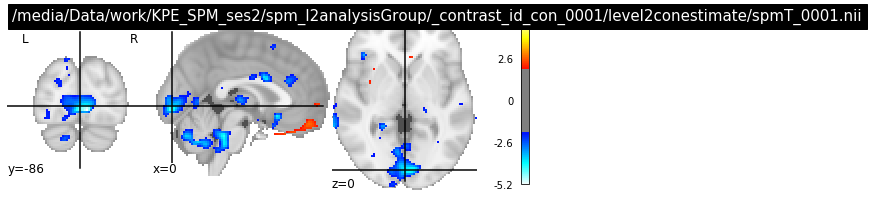

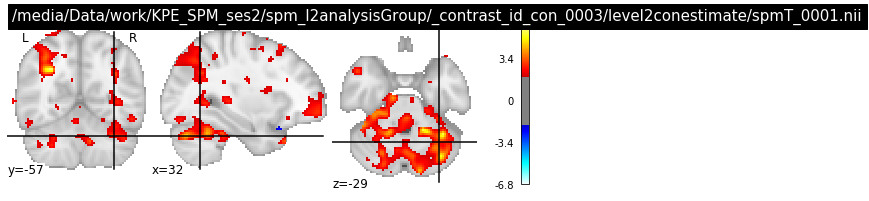

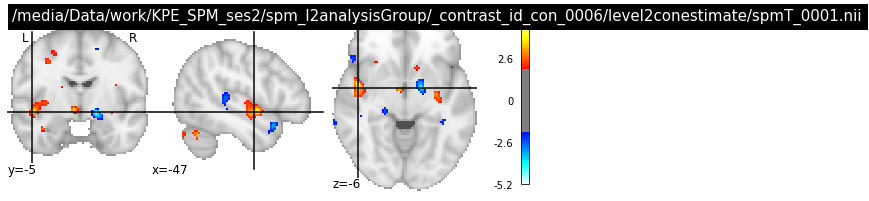

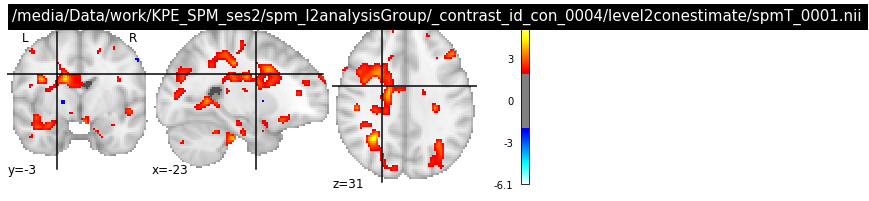

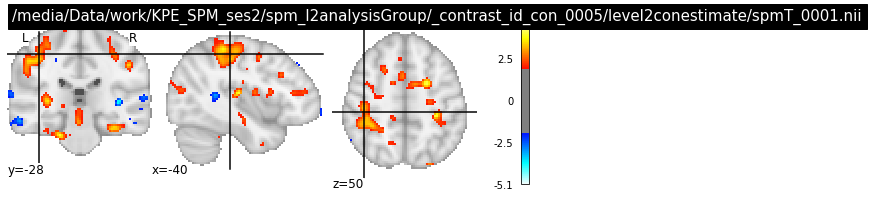

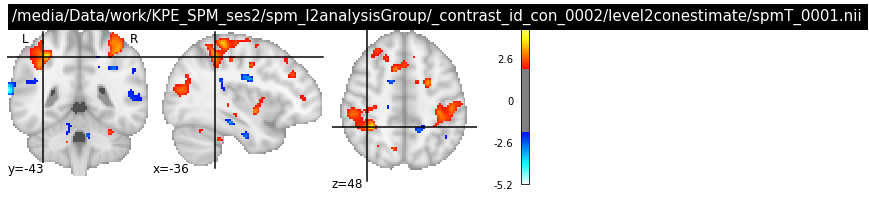

In [40]:
for stat in conFiles:
    plotting.plot_stat_map(stat, title=stat, threshold = 2)